# NOTEBOOK PART 2

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


In [40]:
df_train = pd.read_csv("train2_dataset.csv")
columnas_a_codificar = ['Primary streaming service','While working','Fav genre','Frequency [Classical]','Frequency [EDM]','Frequency [Folk]','Frequency [Hip hop]','Frequency [Metal]','Frequency [Pop]','Frequency [R&B]','Frequency [Rock]','Frequency [Video game music]', 'Music effects']

# Aplica OneHotEncoder a las columnas seleccionadas
enc = OneHotEncoder(handle_unknown='ignore')
encoded_columns = enc.fit_transform(df_train[columnas_a_codificar])
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=enc.get_feature_names_out(columnas_a_codificar))
df_train_encoded = pd.concat([df_train, encoded_df], axis=1)

# Elimina las columnas originales que han sido codificadas
df_train_encoded = df_train_encoded.drop(columnas_a_codificar, axis=1)

print(df_train_encoded.to_string(index=False))

df_train_encoded.to_csv("train2_dataset.csv", index=False)

 Age  Hours per day  Anxiety  Depression  Insomnia  OCD  Primary streaming service_Apple Music  Primary streaming service_I do not use a streaming service.  Primary streaming service_Other streaming service  Primary streaming service_Spotify  Primary streaming service_YouTube Music  While working_No  While working_Yes  While working_nan  Fav genre_Classical  Fav genre_EDM  Fav genre_Folk  Fav genre_Hip hop  Fav genre_Metal  Fav genre_Pop  Fav genre_R&B  Fav genre_Rock  Fav genre_Video game music  Frequency [Classical]_Never  Frequency [Classical]_Rarely  Frequency [Classical]_Sometimes  Frequency [Classical]_Very frequently  Frequency [EDM]_Never  Frequency [EDM]_Rarely  Frequency [EDM]_Sometimes  Frequency [EDM]_Very frequently  Frequency [Folk]_Never  Frequency [Folk]_Rarely  Frequency [Folk]_Sometimes  Frequency [Folk]_Very frequently  Frequency [Hip hop]_Never  Frequency [Hip hop]_Rarely  Frequency [Hip hop]_Sometimes  Frequency [Hip hop]_Very frequently  Frequency [Metal]_Never  F

Se realiza el árbol de decisiones con Weka

*En este proyecto, utilizaremos el software Weka para construir árboles de decisión utilizando el algoritmo M5P para predecir la columna "Music Effects" de nuestro conjunto de datos. El objetivo es comprender cómo diferentes variables predictoras influyen en los efectos musicales reportados por los usuarios.*

*Proceso de Análisis: Cargaremos nuestro conjunto de datos en Weka y realizaremos cualquier preprocesamiento necesario, como manejo de valores faltantes o normalización de datos; seleccionaremos la columna "Music Effects" como nuestra variable objetivo, que es la que deseamos predecir. En Weka, esta columna se denomina "Class" y debe ser categórica; utilizaremos el algoritmo M5P, un clasificador basado en árboles de decisión que es adecuado para predecir valores numéricos. Este algoritmo construirá un modelo de regresión que relacionará las variables predictoras con la columna "Music Effects".*

*Análisis de Resultados: Una vez que se ejecute el algoritmo, analizaremos los resultados obtenidos.*

*El árbol de decisión nos proporcionará información sobre cómo las diferentes variables predictoras influyen en los efectos musicales reportados por los usuarios, lo que nos ayudará a comprender mejor el comportamiento de la columna "Music Effects".*

*Explicación del Algoritmo M5P: El algoritmo M5P es una extensión del algoritmo M5 que se utiliza para construir modelos de regresión basados en árboles de decisión. Funciona dividiendo recursivamente el conjunto de datos en subconjuntos más pequeños y ajustando un modelo de regresión lineal en cada uno de ellos. Luego, se selecciona el mejor modelo de regresión para cada nodo del árbol y se ajustan los parámetros del modelo utilizando una técnica de poda. El resultado es un árbol de decisión que puede predecir valores numéricos de manera eficaz.*

**Árbol de decisiones - Music Effects_Improve**

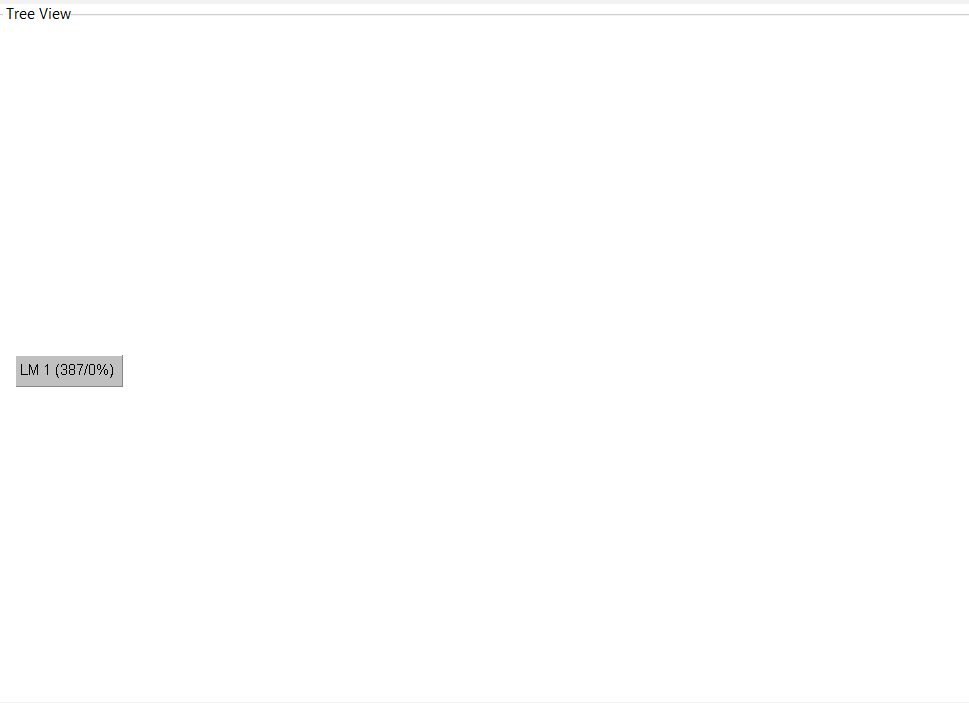

**Árbol de decisiones - Music Effects_No effect**

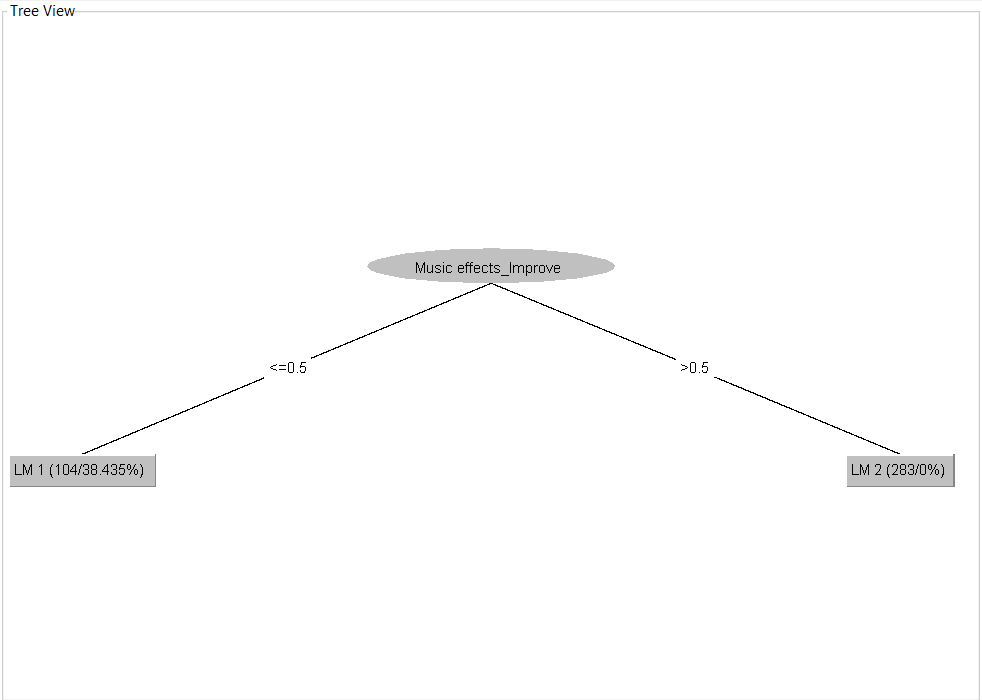

# ***Taller de K-means***

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [33]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv("train2_dataset.csv")

# Mostrar las primeras filas del DataFrame para verificar su carga
print(df.head())

    Age  Hours per day  Anxiety  Depression  Insomnia   OCD  \
0  29.0            4.0      8.0         8.0       5.0  10.0   
1  17.0            4.0      4.0         2.0       0.0   0.0   
2  19.0            8.0      7.0         2.0       1.0   6.0   
3  41.0            3.0      6.0         5.0       4.0   0.0   
4  33.0            1.0      3.0        10.0       4.0   1.0   

   Primary streaming service_Apple Music  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Primary streaming service_I do not use a streaming service.  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                         

In [34]:
# Eliminar filas con valores nulos
df = df.dropna()

In [37]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

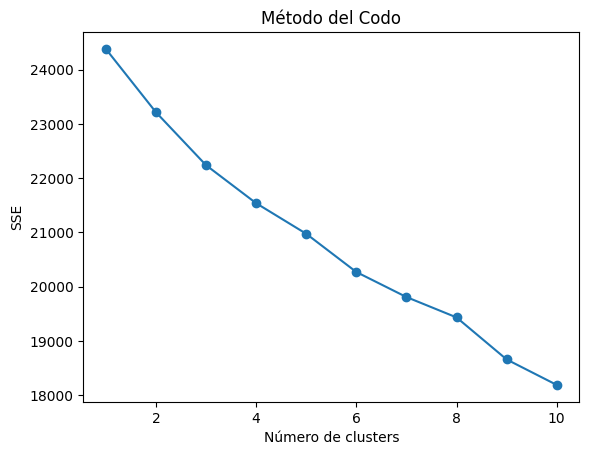

In [38]:
# Método del codo para determinar el número de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Graficar el SSE por número de clusters
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

In [39]:
# Ejecutar K-means con el número de clusters seleccionado
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Añadir los resultados al DataFrame original para análisis
df['Cluster'] = clusters

# Visualizar resultados
print(df.groupby('Cluster').mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Age  Hours per day   Anxiety  Depression  Insomnia       OCD  \
Cluster                                                                       
0        27.779661       2.323729  4.966102    3.389831  4.000000  1.898305   
1        26.718310       3.357042  6.732394    5.897887  3.686620  2.742958   
2        22.416667       3.195833  5.583333    4.562500  3.083333  2.633333   
3        25.196970       3.356061  5.560606    4.969697  4.575758  2.333333   

         Primary streaming service_Apple Music  \
Cluster                                          
0                                     0.067797   
1                                     0.035211   
2                                     0.066667   
3                                     0.060606   

         Primary streaming service_I do not use a streaming service.  \
Cluster                                                                
0                                                 0.237288             
1       